### Collaborative filtering

one of the most widely used core algorithms in recommendation systems. It provides personalized recommendations by automatically predicting a user's interests or preferences based on preference information (such as likes and behavioral data) collected from many users. This method is based on the assumption that "if people with similar tastes to mine like something, I am also likely to like it."


###  Item Collaborative Filtering

Suppose user **A** has watched the movies "E.T." and "Indiana Jones."

- Traditional item-based collaborative filtering (ICF) recommends movies to **A** based on what other users with similar viewing histories have also watched.
- In other words, recommendations are based solely on *co-viewing patterns*:
  > "People who watched these movies also watched..."


### But RCF ->  Leveraging Multiple Item Relations

**RCF (Relational Collaborative Filtering)** is a recommender system framework that leverages multiple item relations, going beyond the traditional collaborative filtering approach. Below, you'll find a clear markdown explanation with real-world examples.

RCF doesn't just look at co-viewing. It considers various explicit relationships between items (movies, songs, etc.), such as:

- **Same director:** "E.T." and "Schindler's List" are both directed by Steven Spielberg.
- **Same genre:** "E.T." and "The Avengers" are both science fiction.
- **Same actor:** "E.T." and another movie might share an actor.


.

.

.


#### Movie Recommendation Example



##### Scenario

User **B** has watched "E.T."  
There are several possible relations between "E.T." and other movies:

- **Director:** "E.T." and "Schindler's List" (both by Spielberg)
- **Genre:** "E.T." and "The Avengers" (both science fiction)
- **Actor:** "E.T." and another movie with the same actor

##### How RCF Recommends

1. **Classify by relation type:** Identify all possible relations (director, genre, actor, etc.) between "E.T." and candidate movies.
2. **First-level attention:** Determine which relation types matter most to user **B**.
   - For example, if **B** cares more about genre, movies with the same genre as "E.T." get higher weight.
3. **Second-level attention:** Within each relation type, assess which specific values (e.g., "science fiction" vs. "action") or which directors/actors are most relevant to **B**.
   - If **B** especially likes science fiction, those movies are prioritized.
4. **Final recommendation:** Combine **B**'s interaction history and their relation-based preferences to recommend, for example, "The Avengers" (same genre) or "Schindler's List" (same director).

##### Example Recommendation Explanations

- Recommending "The Avengers":
  > "Recommended because both 'E.T.' and 'The Avengers' are science fiction movies you like."
- Recommending "Schindler's List":
  > "Recommended because you like movies directed by Steven Spielberg."

RCF thus provides both personalized recommendations and clear explanations based on diverse item relations.

### Summary Table: ICF vs. RCF

| Aspect                | Traditional ICF                              | RCF (Relational Collaborative Filtering)                |
|-----------------------|----------------------------------------------|--------------------------------------------------------|
| Main signal           | Co-viewed/co-purchased items                 | Multiple explicit item relations (director, genre, etc.)|
| Personalization       | Based on similar users or items              | Based on user-specific relation preferences            |
| Explanation           | Limited ("People also watched...")           | Rich ("Same director/genre as movies you liked")       |
| Example               | "People who watched X also watched Y"        | "Recommended because both are sci-fi movies"           |



---

#### Data need

To implement RCF (Relational Collaborative Filtering), you need not only the traditional recommender system data (user-item interactions), but also a structured representation of various item-to-item relations.

1 - user - item interaction matrix

| UserID | ItemID | Rating/Interaction |
|--------|--------|--------------------|
| U1     | Movie1 | 5                  |
| U1     | Movie3 | 4                  |
| U2     | Movie1 | 3                  |
| U2     | Movie2 | 5                  |

2 - item meta Data

| ItemID | Director      | Genre        | Actor1      | Actor2      | Year |
|--------|---------------|--------------|-------------|-------------|------|
| Movie1 | Spielberg     | Sci-Fi       | Tom Hanks   | Drew Barrymore | 1982 |
| Movie2 | Spielberg     | Drama        | Liam Neeson | Ralph Fiennes  | 1993 |
| Movie3 | Joss Whedon   | Sci-Fi       | Robert Downey Jr | Chris Evans | 2012 |

---

#### Data Analysis

df_ratings: User-Item interactions (core data!)

df_movies: Movie metadata (title, genre)

df_links: External links (IMDb, TMDb)

df_tags: User-generated tag information

In [1]:
import pandas as pd

df_links = pd.read_csv('links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags = pd.read_csv('tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Data Structure

- Total rows: 100,836 entries (100K rating records)
- Total columns: 4 columns
- Memory usage: 3.1 MB

- No missing values: Complete dataset with no gaps

- Sufficient data volume: 100K ratings available for training

- Temporal information: Timestamp enables temporal pattern analysis

- Clean data structure: All columns properly formatted


In [7]:
# User and Movie Distribution Analysis
print("=== Basic Statistics ===")
print(f"Total number of users: {df_ratings['userId'].nunique():,}")
print(f"Total number of movies: {df_ratings['movieId'].nunique():,}")
print(f"Average rating: {df_ratings['rating'].mean():.2f}")
print(f"Rating distribution:\n{df_ratings['rating'].value_counts().sort_index()}")

# User rating count distribution
user_rating_counts = df_ratings.groupby('userId').size()
print(f"\nUser rating count distribution:")
print(f"Average: {user_rating_counts.mean():.1f} ratings")
print(f"Median: {user_rating_counts.median():.1f} ratings")
print(f"Maximum: {user_rating_counts.max()} ratings")

=== Basic Statistics ===
Total number of users: 610
Total number of movies: 9,724
Average rating: 3.50
Rating distribution:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

User rating count distribution:
Average: 165.3 ratings
Median: 70.5 ratings
Maximum: 2698 ratings


---

### ICF

=== ICF (Item-based Collaborative Filtering) Implementation ===

1. Data Preparation for ICF
User-Item Matrix Shape: (610, 9724)
Sparsity: 98.30%

2. Computing Item Similarities
Item Similarity Matrix Shape: (9724, 9724)
Average similarity: 0.0560

3. ICF prediction function defined!

4. Model Evaluation Setup
Train data: 80668 ratings
Test data: 20168 ratings

5. Making Predictions on Test Set
Processing predictions...
Total predictions made: 1000

6. ICF Performance Metrics

ICF Performance Results:
RMSE: 1.0680
MAE: 0.7547
Mean Actual Rating: 3.4905
Mean Predicted Rating: 3.4331


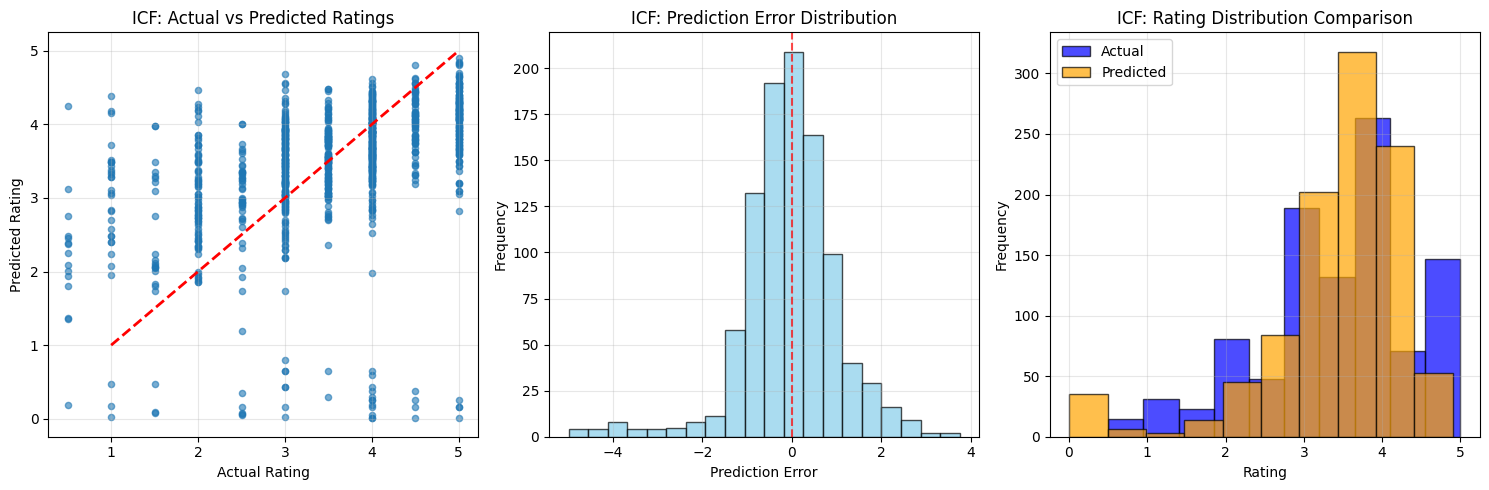


ICF Results stored for comparison with RCF!

ICF Implementation Complete!


In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### ICF Implementation

print("=== ICF (Item-based Collaborative Filtering) Implementation ===")

# 1. Data Preparation for ICF
print("\n1. Data Preparation for ICF")

# Create user-item matrix
user_item_matrix = df_ratings.pivot_table(
    index='userId', 
    columns='movieId', 
    values='rating'
).fillna(0)

print(f"User-Item Matrix Shape: {user_item_matrix.shape}")
print(f"Sparsity: {(user_item_matrix == 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100:.2f}%")

# 2. Item Similarity Calculation
print("\n2. Computing Item Similarities")

# Transpose to get item-user matrix
item_user_matrix = user_item_matrix.T

# Calculate cosine similarity between items
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(
    item_similarity, 
    index=item_user_matrix.index, 
    columns=item_user_matrix.index
)

print(f"Item Similarity Matrix Shape: {item_similarity_df.shape}")
print(f"Average similarity: {item_similarity_df.values.mean():.4f}")

# 3. ICF Prediction Function
def icf_predict(user_id, movie_id, user_item_matrix, item_similarity_df, k=20):
    """
    ICF prediction function
    
    Args:
        user_id: User ID
        movie_id: Movie ID
        user_item_matrix: User-Item matrix
        item_similarity_df: Item similarity matrix
        k: Number of similar items to consider
    
    Returns:
        predicted_rating: Predicted rating
    """
    
    # Movies rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index
    
    # Similarity between target movie and user's rated movies
    if movie_id not in item_similarity_df.index:
        return user_ratings.mean() if user_ratings.mean() > 0 else 3.0
    
    similarities = item_similarity_df.loc[movie_id, rated_movies]
    
    # Select top k similar items
    top_similar = similarities.nlargest(k)
    
    if len(top_similar) == 0 or top_similar.sum() == 0:
        return user_ratings.mean() if user_ratings.mean() > 0 else 3.0
    
    # Calculate weighted average prediction
    numerator = sum(sim * user_ratings[movie] for movie, sim in top_similar.items())
    denominator = sum(abs(sim) for sim in top_similar.values)
    
    if denominator == 0:
        return user_ratings.mean() if user_ratings.mean() > 0 else 3.0
    
    predicted_rating = numerator / denominator
    return max(0.5, min(5.0, predicted_rating))  # Clip to valid range

print("\n3. ICF prediction function defined!")

# 4. Train-Test Split and Evaluation
print("\n4. Model Evaluation Setup")

# Train-test split
train_data, test_data = train_test_split(df_ratings, test_size=0.2, random_state=42)

print(f"Train data: {len(train_data)} ratings")
print(f"Test data: {len(test_data)} ratings")

# Create training user-item matrix
train_matrix = train_data.pivot_table(
    index='userId', 
    columns='movieId', 
    values='rating'
).fillna(0)

# Recalculate item similarity on training data
train_item_user = train_matrix.T
train_item_similarity = cosine_similarity(train_item_user)
train_item_similarity_df = pd.DataFrame(
    train_item_similarity, 
    index=train_item_user.index, 
    columns=train_item_user.index
)

# 5. Make Predictions on Test Set
print("\n5. Making Predictions on Test Set")

predictions = []
actuals = []

# Use subset of test data for faster computation
test_sample = test_data.sample(n=1000, random_state=42)

print("Processing predictions...")
for idx, row in test_sample.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    actual_rating = row['rating']
    
    # Check if user exists in training data
    if user_id in train_matrix.index:
        predicted_rating = icf_predict(
            user_id, movie_id, train_matrix, train_item_similarity_df, k=20
        )
        predictions.append(predicted_rating)
        actuals.append(actual_rating)

print(f"Total predictions made: {len(predictions)}")

# 6. Calculate Performance Metrics
print("\n6. ICF Performance Metrics")

if len(predictions) > 0:
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    print(f"\nICF Performance Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Mean Actual Rating: {np.mean(actuals):.4f}")
    print(f"Mean Predicted Rating: {np.mean(predictions):.4f}")
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Actual vs Predicted scatter plot
    plt.subplot(1, 3, 1)
    plt.scatter(actuals, predictions, alpha=0.6, s=20)
    plt.plot([1, 5], [1, 5], 'r--', linewidth=2)
    plt.xlabel('Actual Rating')
    plt.ylabel('Predicted Rating')
    plt.title('ICF: Actual vs Predicted Ratings')
    plt.grid(True, alpha=0.3)
    
    # Prediction error distribution
    plt.subplot(1, 3, 2)
    errors = np.array(predictions) - np.array(actuals)
    plt.hist(errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title('ICF: Prediction Error Distribution')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    plt.grid(True, alpha=0.3)
    
    # Rating distribution comparison
    plt.subplot(1, 3, 3)
    plt.hist(actuals, bins=10, alpha=0.7, label='Actual', color='blue', edgecolor='black')
    plt.hist(predictions, bins=10, alpha=0.7, label='Predicted', color='orange', edgecolor='black')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('ICF: Rating Distribution Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Store ICF results for later comparison with RCF
    icf_results = {
        'rmse': rmse,
        'mae': mae,
        'predictions': predictions,
        'actuals': actuals,
        'model_name': 'ICF'
    }
    
    print(f"\nICF Results stored for comparison with RCF!")
    
else:
    print("No predictions could be made! Check data preprocessing.")

print("\n" + "="*60)
print("ICF Implementation Complete!")
print("="*60)

---

writer

https://github.com/Blunf/BI_MP_EDA